In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/occupancy_data/CarBuyers.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
# Первые 5 строк датасета
data.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


In [48]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(6092, 11)

In [49]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 6092


In [50]:
# Список колонок
data.columns

Index(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC',
       'Fuel', 'Male', 'Female', 'Unknown', 'Total'],
      dtype='object')

In [51]:
# Список колонок с типами данных
data.dtypes

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male             object
Female           object
Unknown          object
Total            object
dtype: object

In [52]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Manufacturer - 0
Model - 0
Price - 0
Transmission - 0
Power - 0
Engine CC - 0
Fuel - 0
Male - 0
Female - 0
Unknown - 0
Total - 0


In [53]:
# Основные статистические характеристки набора данных
data.describe()

,Price,Transmission,Power,Engine CC
count,6092.000000,6092.000000,6092.000000,6092.000000
mean,41.230074,5.131491,111.478881,1982.083952
std,51.357916,1.343858,67.621849,817.410323
min,3.332200,0.000000,15.600000,0.000000
25%,18.513000,4.600000,70.250000,1497.127119
50%,29.043000,5.000000,94.062500,1832.888889
75%,43.863631,5.966102,121.857143,2247.333333
max,646.605000,8.277311,450.000000,6208.000000


In [54]:
# Определим уникальные значения для целевого признака
data['Fuel'].unique()

array(['petrol', 'diesel', 'automatic'], dtype=object)

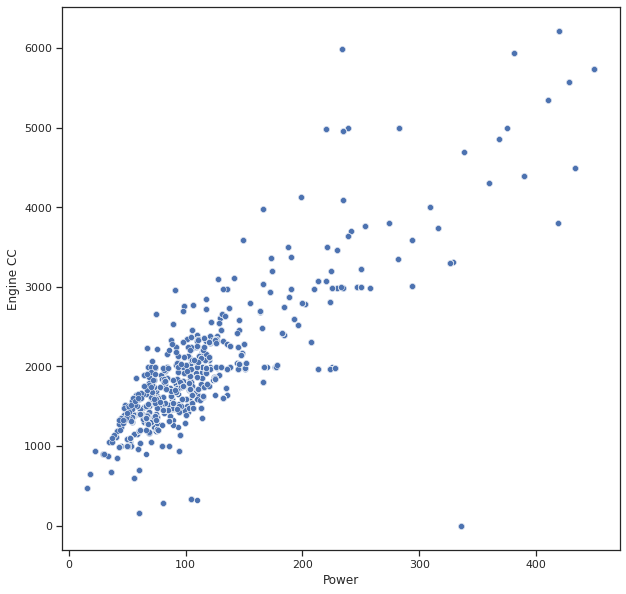

In [56]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Power', y='Engine CC', data=data)

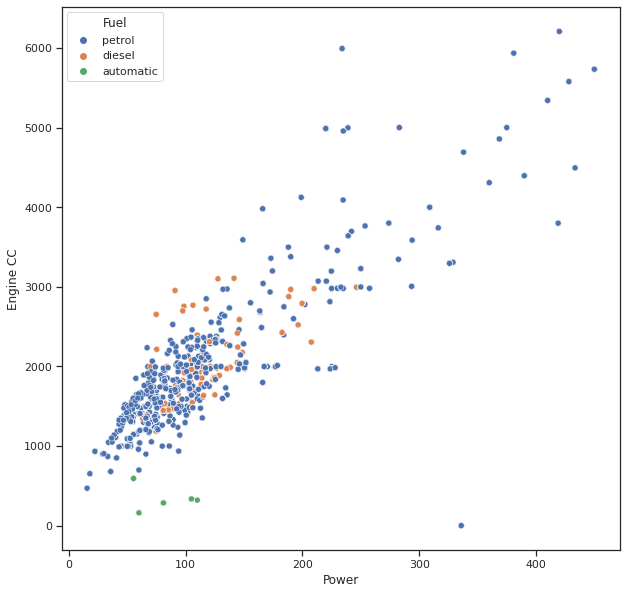

In [57]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Power', y='Engine CC', data=data, hue='Fuel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


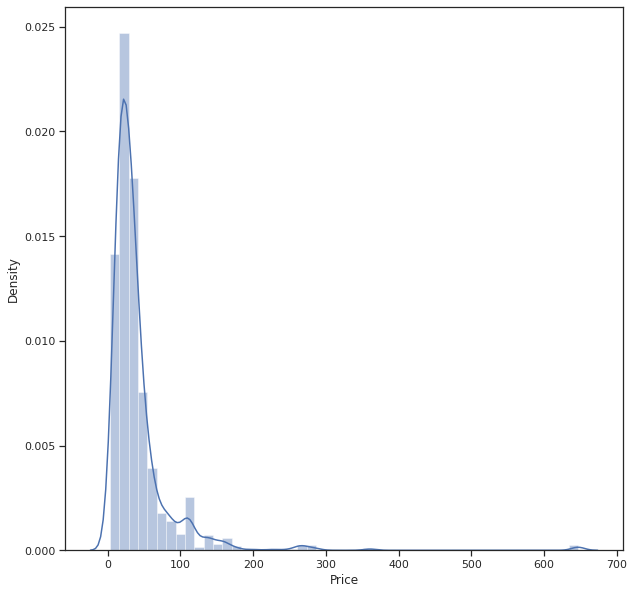

In [58]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Price'])

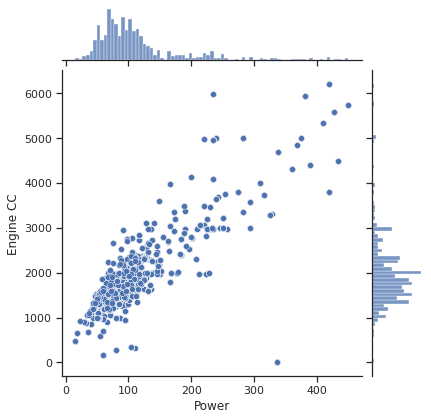

In [59]:
sns.jointplot(x='Power', y='Engine CC', data=data)

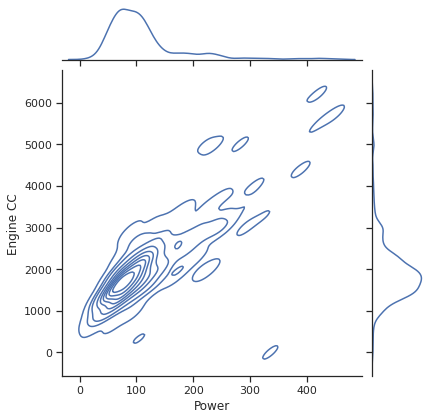

In [60]:
sns.jointplot(x='Power', y='Engine CC', data=data, kind="kde")

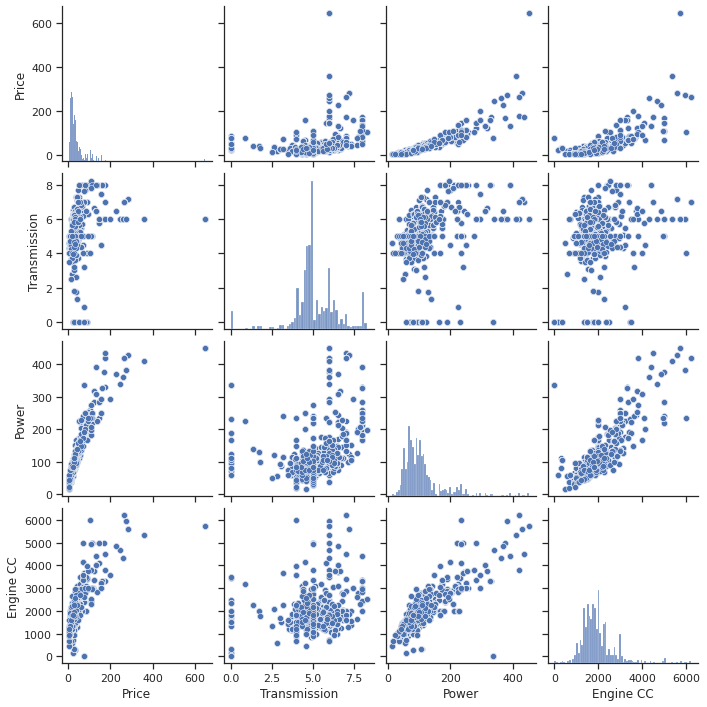

In [61]:
sns.pairplot(data)

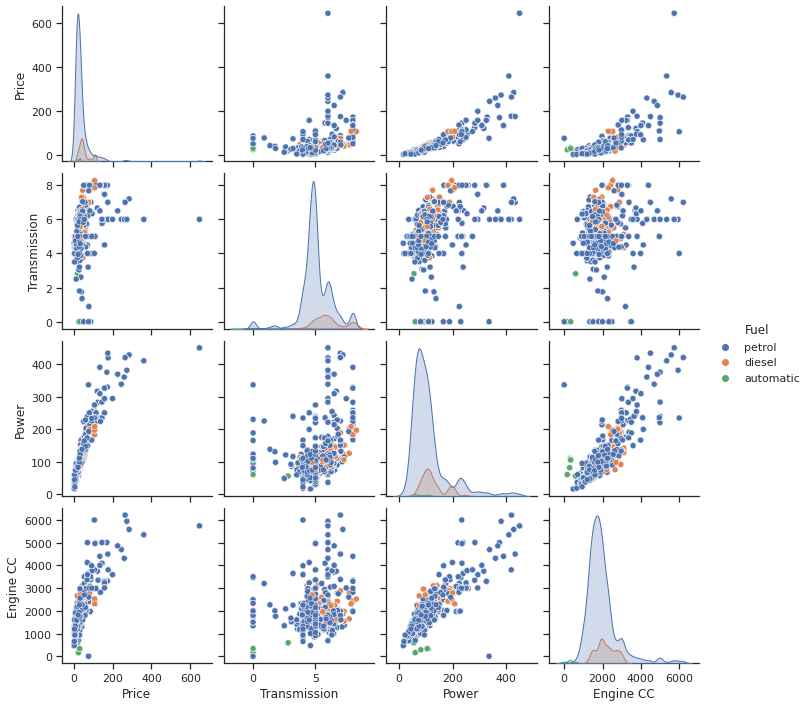

In [64]:
sns.pairplot(data, hue="Fuel")

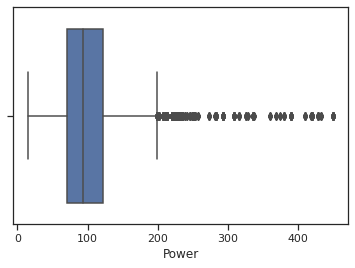

In [68]:
sns.boxplot(x=data['Power'])

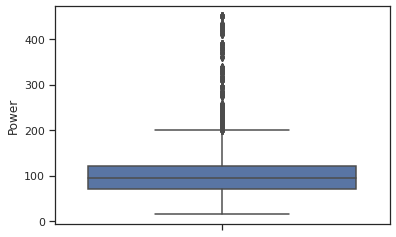

In [69]:
sns.boxplot(y=data['Power'])

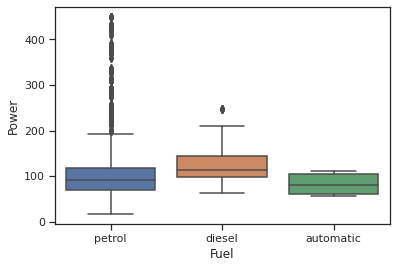

In [70]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Fuel', y='Power', data=data)

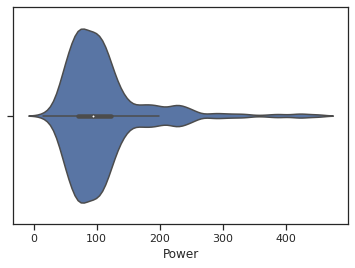

In [71]:
sns.violinplot(x=data['Power'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


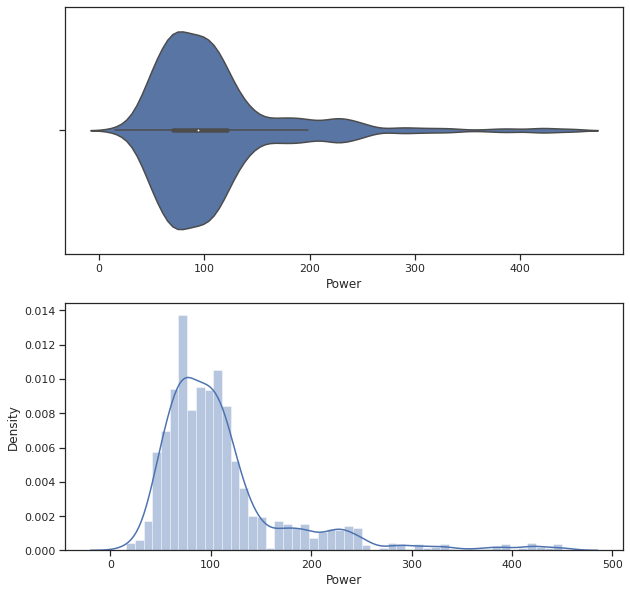

In [72]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Power'])
sns.distplot(data['Power'], ax=ax[1])

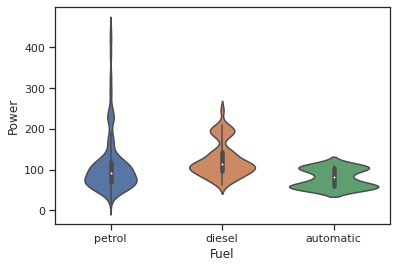

In [73]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Fuel', y='Power', data=data)

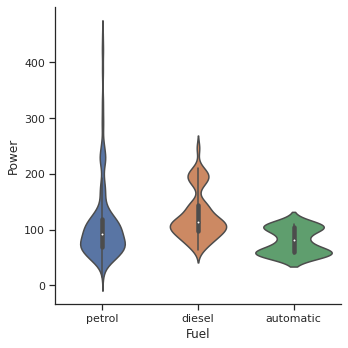

In [74]:
sns.catplot(x='Fuel', y='Power', data=data, kind="violin", split=True)

In [75]:
data.corr()

,Price,Transmission,Power,Engine CC
Price,1.000000,0.329598,0.849530,0.752509
Transmission,0.329598,1.000000,0.401518,0.277336
Power,0.849530,0.401518,1.000000,0.822792
Engine CC,0.752509,0.277336,0.822792,1.000000


In [76]:
data.corr(method='pearson')

,Price,Transmission,Power,Engine CC
Price,1.000000,0.329598,0.849530,0.752509
Transmission,0.329598,1.000000,0.401518,0.277336
Power,0.849530,0.401518,1.000000,0.822792
Engine CC,0.752509,0.277336,0.822792,1.000000


In [77]:
data.corr(method='kendall')

,Price,Transmission,Power,Engine CC
Price,1.000000,0.333594,0.816375,0.577564
Transmission,0.333594,1.000000,0.302816,0.121269
Power,0.816375,0.302816,1.000000,0.616879
Engine CC,0.577564,0.121269,0.616879,1.000000


In [78]:
data.corr(method='spearman')

,Price,Transmission,Power,Engine CC
Price,1.000000,0.476002,0.952974,0.763251
Transmission,0.476002,1.000000,0.437788,0.182373
Power,0.952974,0.437788,1.000000,0.798236
Engine CC,0.763251,0.182373,0.798236,1.000000


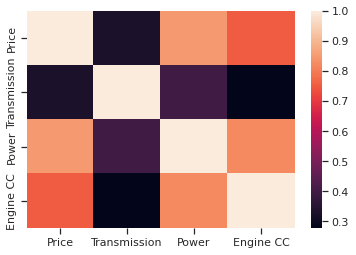

In [79]:
sns.heatmap(data.corr())

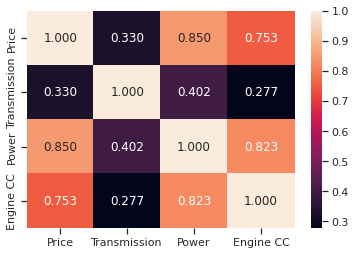

In [80]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

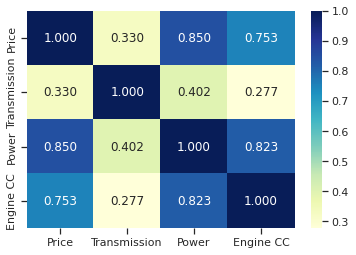

In [81]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


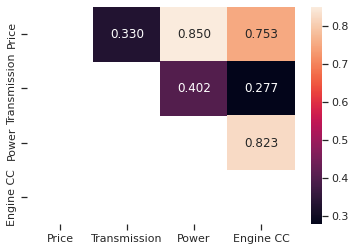

In [82]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

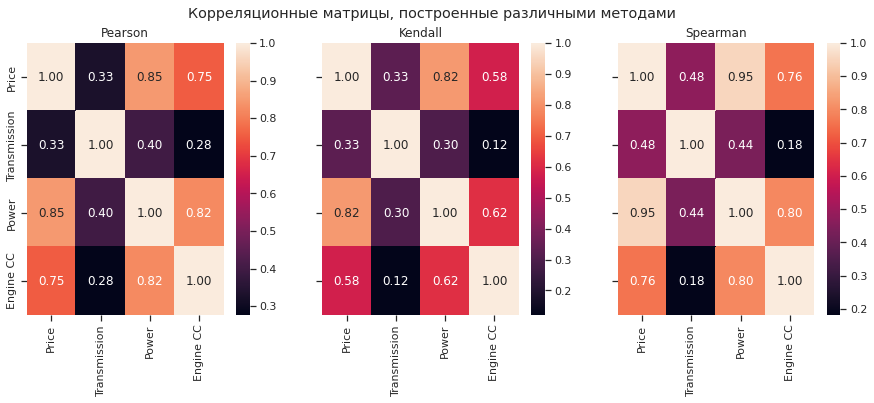

In [83]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')